In [ ]:
import tensorflow as tf
import pandas as pd
import plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
import pandas as pd
from pathlib import Path

data = r"C:\Users\Admin\Documents\Downloads\Emotion dataset dl\images"

paths = [path.parts[-2:] for path in
         Path(data).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df = pd.DataFrame(data=paths, columns=['Class','Images'])     #create column names for dataframe
df = df.sort_values('Class',ascending=True)                   #sort class name
df.reset_index(drop=True, inplace=True)                       #sort index of each row
df

,Class,Images
0,angry,0.jpg
1,angry,10373.jpg
2,angry,10377.jpg
3,angry,10378.jpg
4,angry,10385.jpg
...,...,...
71769,surprise,18207.jpg
71770,surprise,1822.jpg
71771,surprise,18229.jpg
71772,surprise,18152.jpg


In [ ]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 71774
Class Count : 7 

Count the number of images in each class
Class
happy       17978
neutral     12396
sad         12154
fear        10242
angry        9906
surprise     8004
disgust      1094
Name: count, dtype: int64


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


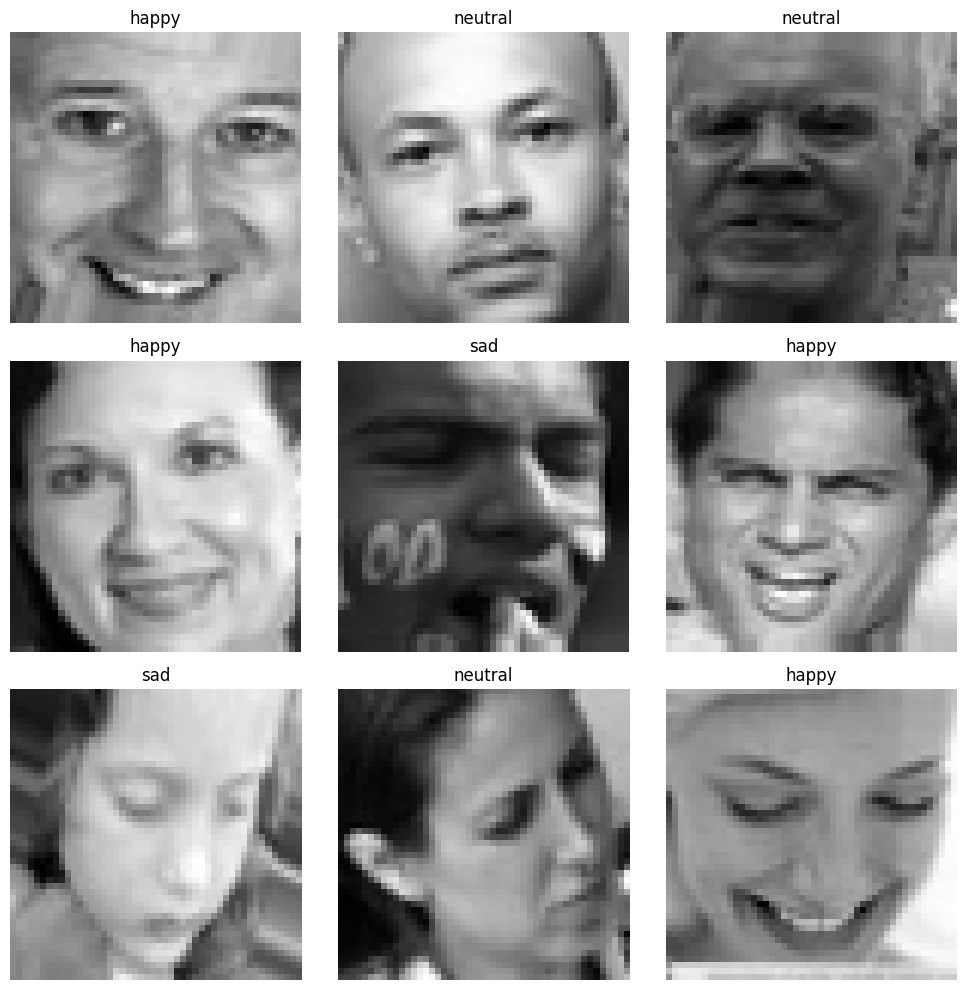

In [ ]:
data_dir = r"C:\Users\Admin\Documents\Downloads\Emotion dataset dl\images"
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)
class_names = list(train_generator.class_indices.keys())

images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48, 48), cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count Image')

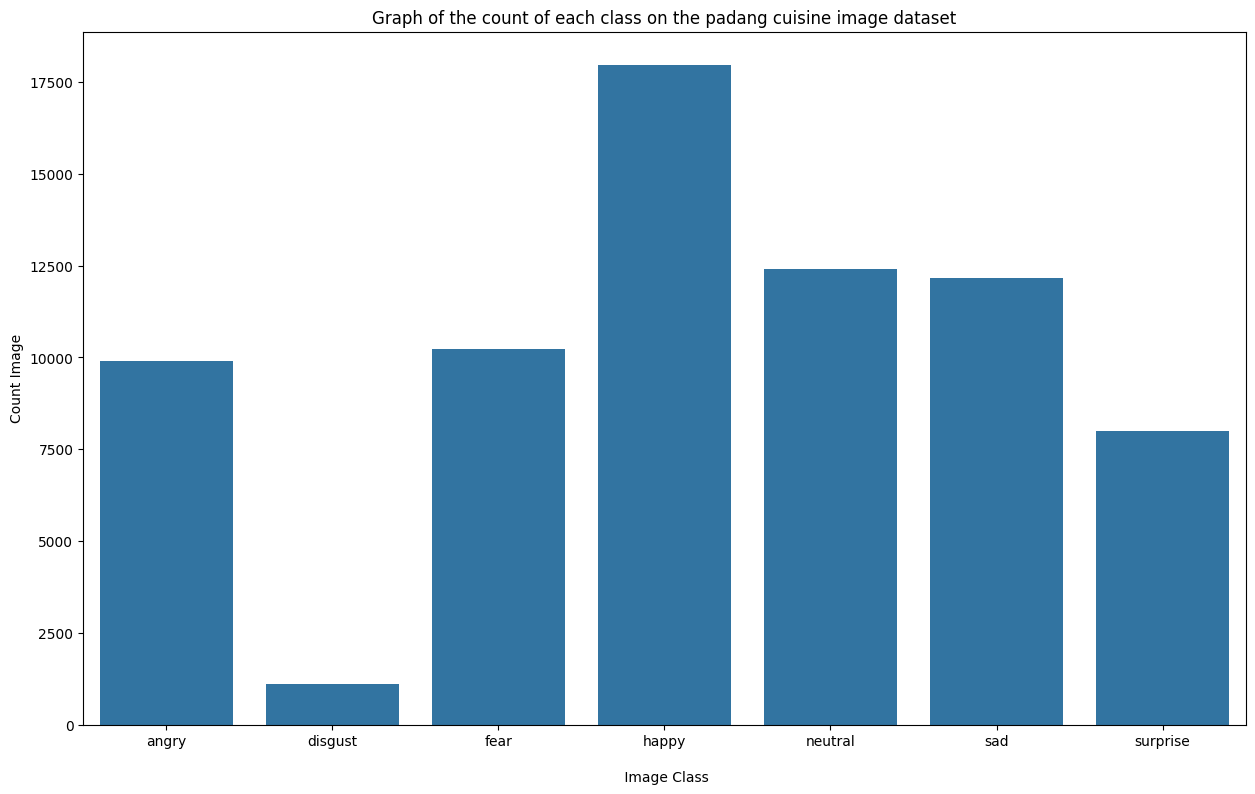

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(data=df, x='Class')
plt.title('Graph of the count of each class on the padang cuisine image dataset')
plt.xlabel('\n Image Class')
plt.ylabel('Count Image')

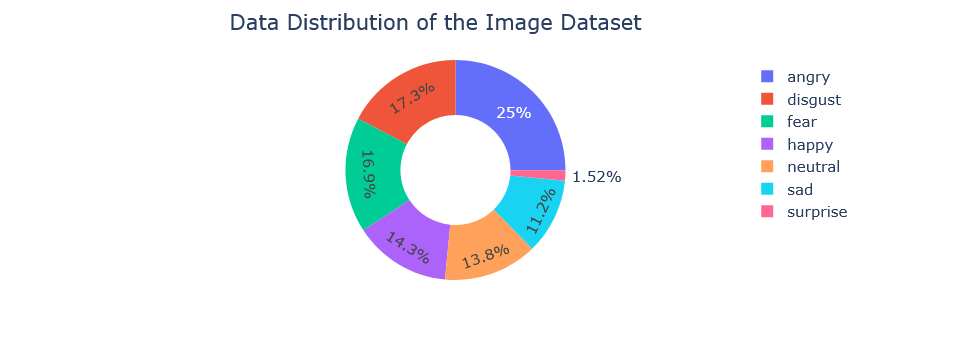

In [ ]:
Class_Id_Dist_Total = df['Class'].value_counts(sort=False)

import plotly.express as px
fig=px.pie(Class_Id_Dist_Total,values= df['Class'].value_counts(), names=df['Class'].unique(),hole=0.500)
fig.update_layout(title='Data Distribution of the Image Dataset',font_size=15,title_x=0.45)
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

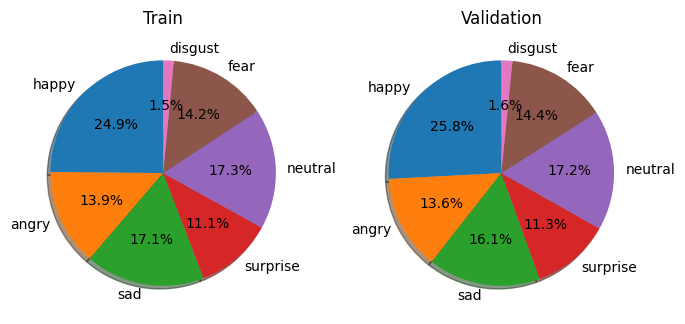

Emotion : happy
	Training : 7164
	 Testing : 1825
Emotion : angry
	Training : 3993
	 Testing : 960
Emotion : sad
	Training : 4938
	 Testing : 1139
Emotion : surprise
	Training : 3205
	 Testing : 797
Emotion : neutral
	Training : 4982
	 Testing : 1216
Emotion : fear
	Training : 4103
	 Testing : 1018
Emotion : disgust
	Training : 436
	 Testing : 111


In [ ]:
folder_path =  r"C:\Users\Admin\Documents\Downloads\Emotion dataset dl\images"
train_dir = folder_path + '/train/'
val_dir = folder_path + '/validation/'
emotions = ['happy', 'angry', 'sad', 'surprise', 'neutral', 'fear', 'disgust']
plt.show()


x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in emotions ])
x_val = np.array([ len(os.listdir(val_dir+i+'/')) for i in emotions ])
label = emotions

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_val, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Validation')
plt.show()

for i in emotions:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(val_dir+i+'/'))))
